In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

# Step 1: Load the Datasets
# -----------------------------------------------------
# Load Amazon Prime dataset
amazon_prime_df = pd.read_csv (r'C:\Users\DKN\Downloads\data.csv')
# Load IMDb dataset
imdb_df = pd.read_csv(r"C:\Users\DKN\Downloads\imdb_movie_dataset.csv")

In [11]:

# Step 2: Rename Columns for Consistency
# -----------------------------------------------------
# Renaming columns in Amazon Prime dataset to match IMDb dataset
amazon_prime_df = amazon_prime_df.rename(columns={
    'title': 'Title',
    'type': 'Type',
    'genres': 'Genres',
    'releaseYear': 'Release Year',
    'imdbId': 'IMDb ID',
    'imdbAverageRating': 'IMDb Average Rating',
    'imdbNumVotes': 'IMDb Number of Votes',
    'availableCountries': 'Available Countries'
})

# Renaming columns in IMDb dataset to ensure consistency
imdb_df = imdb_df.rename(columns={
    'Rank': 'Rank',
    'Title': 'Title',
    'Genre': 'Genres',
    'Description': 'Description',
    'Director': 'Director',
    'Actors': 'Actors',
    'Year': 'Release Year',
    'Runtime (Minutes)': 'Runtime (Minutes)',
    'Rating': 'IMDb Average Rating',
    'Votes': 'IMDb Number of Votes'
})

In [29]:

# Step 3: Data Type Conversion
# -----------------------------------------------------
# Ensure numerical columns are correctly formatted
amazon_prime_df['Release Year'] = pd.to_numeric(amazon_prime_df['Release Year'], errors='coerce')
amazon_prime_df['IMDb Average Rating'] = pd.to_numeric(amazon_prime_df['IMDb Average Rating'], errors='coerce')
imdb_df['Release Year'] = pd.to_numeric(imdb_df['Release Year'], errors='coerce')
imdb_df['IMDb Average Rating'] = pd.to_numeric(imdb_df['IMDb Average Rating'], errors='coerce')

In [13]:

# Step 4: Handling Missing Values
# -----------------------------------------------------
# Drop rows with missing titles, as it's a key column for merging
amazon_prime_df.dropna(subset=['Title'], inplace=True)
imdb_df.dropna(subset=['Title'], inplace=True)


In [17]:

# Step 5: Merge the Datasets
# -----------------------------------------------------
# Merge the two datasets on 'Title' with an inner join
merged_df = pd.merge(amazon_prime_df, imdb_df, on='Title', how='inner')
print(merged_df)

                                                  Title   Type  \
0                                       The Dark Knight  movie   
1                                   Lucky Number Slevin  movie   
2                          Sin City: A Dame to Kill For  movie   
3     Indiana Jones and the Kingdom of the Crystal S...  movie   
4                                      Ocean's Thirteen  movie   
...                                                 ...    ...   
1012                                    Vampire Academy     tv   
1013                                          Moonlight     tv   
1014                                              Enemy     tv   
1015                                   Marie Antoinette     tv   
1016                                              Viral     tv   

                       Genres_x  Release Year_x     IMDb ID  \
0          Action, Crime, Drama          2008.0   tt0468569   
1        Crime, Drama, Thriller          2006.0   tt0425210   
2       Action, Cr

In [21]:

# Step 6: Basic Data Cleaning Post-Merge
# -----------------------------------------------------
# Fill NaN values in relevant columns with zeroes to simplify analysis
merged_df.fillna({'IMDb Average Rating': 0, 'IMDb Number of Votes': 0, 'Runtime (Minutes)': 0}, inplace=True)
# Drop '_y' columns and rename '_x' columns
merged_df = merged_df.drop(columns=['Genres_y', 'Release Year_y', 'IMDb Average Rating_y', 'IMDb Number of Votes_y'])
merged_df = merged_df.rename(columns={
    'Genres_x': 'Genres',
    'Release Year_x': 'Release Year',
    'IMDb Average Rating_x': 'IMDb Average Rating',
    'IMDb Number of Votes_x': 'IMDb Number of Votes'
})



In [23]:

# Step 7: Data Analysis
# -----------------------------------------------------
# Calculate average IMDb rating for each genre
genre_ratings = merged_df.groupby('Genres')['IMDb Average Rating'].mean().sort_values(ascending=False)

# Display top genres by rating
print("Top Genres by Average IMDb Rating:\n", genre_ratings.head(10))

Top Genres by Average IMDb Rating:
 Genres
Adventure, Drama, War         8.40
Drama, Mystery, War           8.30
Drama, Fantasy, War           8.20
Drama, Short                  8.20
Adventure, Drama, Thriller    8.00
Biography, Drama, Thriller    8.00
Crime, Documentary            8.00
Drama, Film-Noir, Romance     7.90
Comedy, Drama, Western        7.75
Documentary, Drama            7.70
Name: IMDb Average Rating, dtype: float64


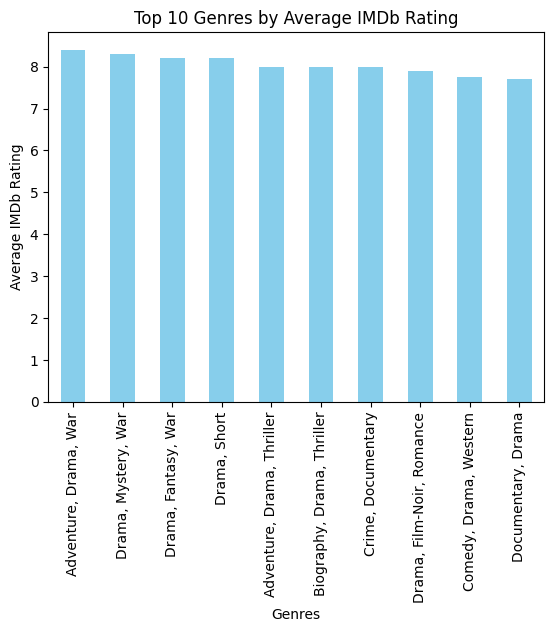

In [24]:

# Step 8: Visualization
# -----------------------------------------------------
# Visualize top genres by average rating using a bar plot
top_genres = genre_ratings.head(10)
top_genres.plot(kind='bar', color='skyblue', title='Top 10 Genres by Average IMDb Rating')
plt.xlabel('Genres')
plt.ylabel('Average IMDb Rating')
plt.show()

In [25]:

# Step 9: Additional Analysis (Optional for extended time)
# -----------------------------------------------------
# Calculate average runtime by genre
genre_runtime = merged_df.groupby('Genres')['Runtime (Minutes)'].mean().sort_values(ascending=False)
print("\nTop Genres by Average Runtime:\n", genre_runtime.head(10))


Top Genres by Average Runtime:
 Genres
Drama, Musical, Romance       158.0
Adventure, Fantasy            158.0
Drama, History, Thriller      157.0
Adventure, Drama, War         153.0
Action, Fantasy               152.0
Thriller, Western             148.0
Adventure, Drama, Thriller    143.0
Comedy, Drama, Western        142.0
Action, Drama, Family         140.0
Adventure, Family, Romance    140.0
Name: Runtime (Minutes), dtype: float64


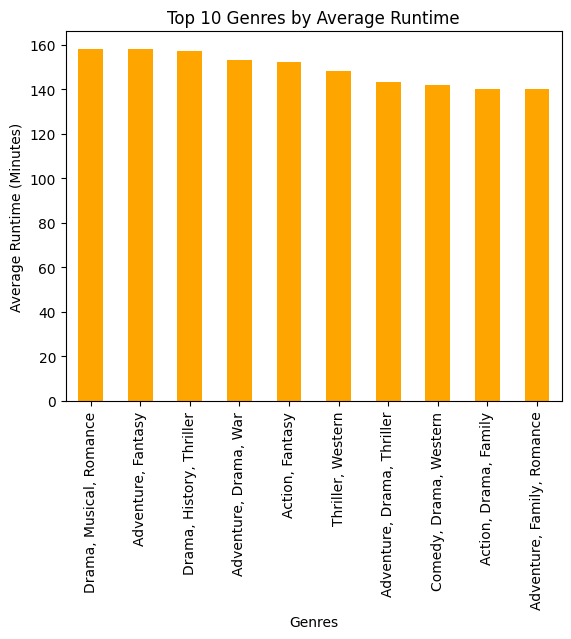

In [26]:
# Plot for average runtime by genre
top_runtimes = genre_runtime.head(10)
top_runtimes.plot(kind='bar', color='orange', title='Top 10 Genres by Average Runtime')
plt.xlabel('Genres')
plt.ylabel('Average Runtime (Minutes)')
plt.show()

In [30]:
# Save merged_df to a CSV file
merged_df.to_csv("merged_data.csv", index=False)
print("DataFrame saved to 'merged_data.csv'")

DataFrame saved to 'merged_data.csv'


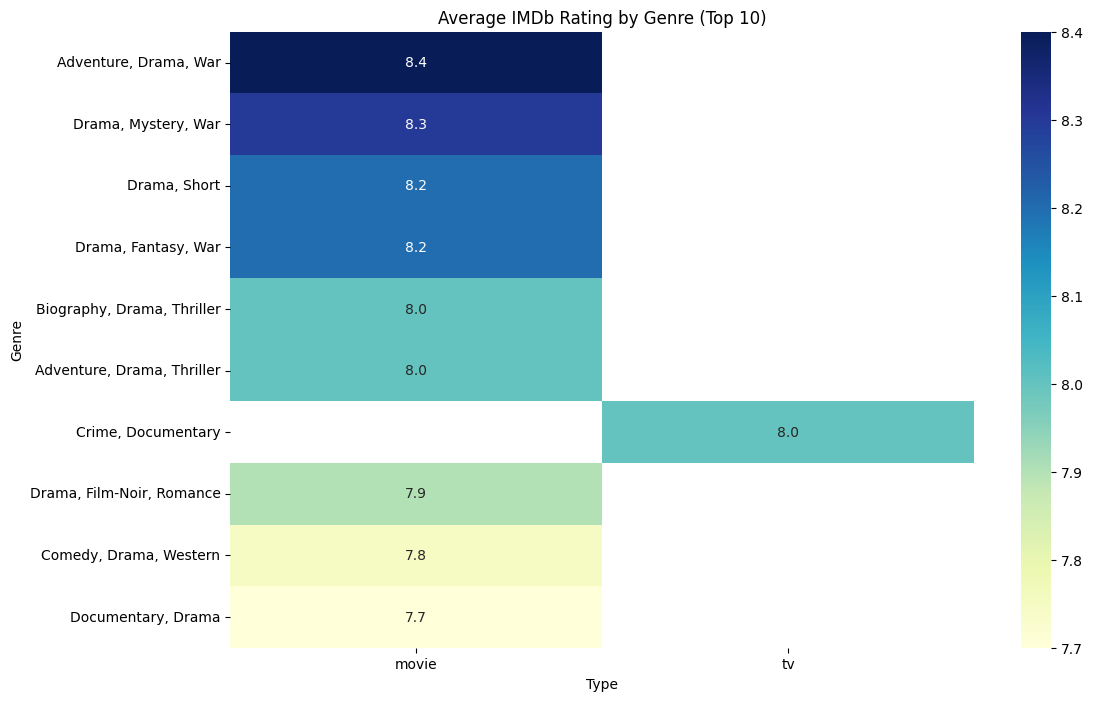

In [31]:
# Calculate average IMDb rating per genre and type
pivot_top_10_genres = merged_df.pivot_table(
    index='Genres',
    columns='Type',
    values='IMDb Average Rating',
    aggfunc='mean'
)

# Sort the genres by average IMDb rating and select the top 10
top_10_genres = pivot_top_10_genres.mean(axis=1).sort_values(ascending=False).head(10).index
pivot_top_10_filtered = pivot_top_10_genres.loc[top_10_genres]

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_top_10_filtered, annot=True, cmap="YlGnBu", fmt=".1f")
plt.title("Average IMDb Rating by Genre (Top 10)")
plt.xlabel("Type")
plt.ylabel("Genre")
plt.show()
